In [ ]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/dvedprakash2/freiburg_groceries_dataset.zip"
!unzip -o freiburg_groceries_dataset.zip 
!rm freiburg_groceries_dataset.zip

In [1]:
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn

from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from imageio import imread


from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from tensorflow.keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,LearningRateScheduler

In [14]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [3]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [4]:
beans = 'dataset/freiburg_groceries_dataset/images/BEANS'
cake = 'dataset/freiburg_groceries_dataset/images/CAKE'
candy = 'dataset/freiburg_groceries_dataset/images/CANDY'
cereal = 'dataset/freiburg_groceries_dataset/images/CEREAL'
chips = 'dataset/freiburg_groceries_dataset/images/CHIPS'
chocolate = 'dataset/freiburg_groceries_dataset/images/CHOCOLATE'
coffee = 'dataset/freiburg_groceries_dataset/images/COFFEE'
corn = 'dataset/freiburg_groceries_dataset/images/CORN'
fish = 'dataset/freiburg_groceries_dataset/images/FISH'
flour = 'dataset/freiburg_groceries_dataset/images/FLOUR'
honey = 'dataset/freiburg_groceries_dataset/images/HONEY'
jam = 'dataset/freiburg_groceries_dataset/images/JAM'
juice = 'dataset/freiburg_groceries_dataset/images/JUICE'
milk = 'dataset/freiburg_groceries_dataset/images/MILK'
nuts = 'dataset/freiburg_groceries_dataset/images/NUTS'
oil = 'dataset/freiburg_groceries_dataset/images/OIL'
pasta = 'dataset/freiburg_groceries_dataset/images/PASTA'
rice = 'dataset/freiburg_groceries_dataset/images/RICE'
soda = 'dataset/freiburg_groceries_dataset/images/SODA'
spices = 'dataset/freiburg_groceries_dataset/images/SPICES'
sugar = 'dataset/freiburg_groceries_dataset/images/SUGAR'
tea = 'dataset/freiburg_groceries_dataset/images/TEA'
tomato_sauce = 'dataset/freiburg_groceries_dataset/images/TOMATO_SAUCE'
vinegar = 'dataset/freiburg_groceries_dataset/images/VINEGAR'
water = 'dataset/freiburg_groceries_dataset/images/WATER'

X = []
Z = []
imgsize = 90


training_data('beans',beans)
training_data('cake',cake)
training_data('candy',candy)
training_data('cereal',cereal)
training_data('chips',chips)
training_data('chocolate',chocolate)
training_data('coffee',coffee)
training_data('corn',corn)
training_data('fish',fish)
training_data('flour',flour)
training_data('honey',honey)
training_data('jam',jam)
training_data('juice',juice)
training_data('milk',milk)
training_data('nuts',nuts)
training_data('oil',oil)
training_data('psata',pasta)
training_data('rice',rice)
training_data('soda',soda)
training_data('spices',spices)
training_data('sugar',sugar)
training_data('tea',tea)
training_data('tomato sauce',tomato_sauce)
training_data('vinegar',vinegar)
training_data('water',water)

100%|██████████| 262/262 [00:00<00:00, 407.92it/s]


In [6]:
from tensorflow.keras.applications import ResNet50
model = Sequential()
model.add(ResNet50(include_top=False,input_shape=(imgsize,imgsize,3), weights='imagenet', pooling='max'))
model.add(Dense(25, activation='softmax'))

In [7]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,25)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

In [9]:
augs_gen.fit(x_train)

In [10]:
# fig,ax=plt.subplots(3,3)
# fig.set_size_inches(15,15)
# for i in range(3):
#     for j in range (3):
#         l=rn.randint(0,len(Z))
#         ax[i,j].imshow(X[l])
#         ax[i,j].set_title('Grocery: '+Z[l])
        
# plt.tight_layout()

In [11]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    save_frequency=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,reduce]

In [12]:
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-3)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=32),
    validation_data  = (x_test,y_test),
    validation_steps = len(x_train)//32,
    steps_per_epoch  = len(x_train)//32,
    epochs = 30, 
    verbose = 1,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
123/123 [==============================] - ETA: 0s - loss: 5.3131 - accuracy: 0.2054WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 123 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.03232, saving model to ./base.model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./base.model/assets
123/123 [==============================] - 130s 1s/step - loss: 5.3131 - accuracy: 0.2054 - val_loss: 954.3455 - val_accuracy: 0.0323 - lr: 1.0000e-04
Epoch 2/30
123/123 [==============================] - ETA: 0s - loss: 3.3614 - accuracy: 0.3806WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dat

Weights Saved


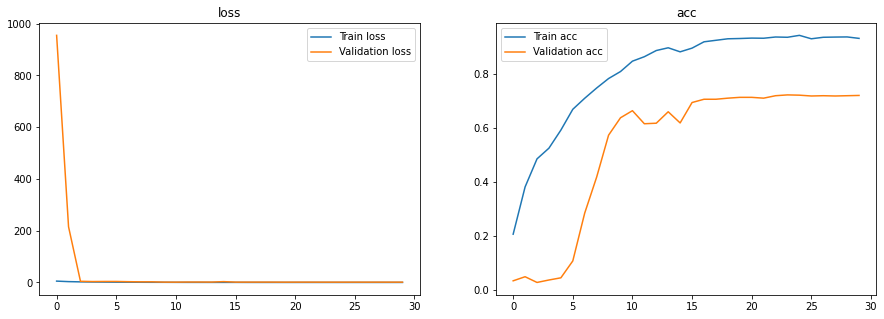

In [17]:
show_final_history(history)
# model.load_weights('base.model')

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")